In [1]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

Iin = 10e-3 * Heaviside(t - 1)

In [3]:
stabilisator = Solver.Circuit("tepavac")
stabilisator.element(
                    CurrentSource("Ig", {"V+" : "Vg", "V-" : Gnd}, I_t = Iin),
                    Resistor("Rg", {"V1" : "Vg", "V2" : "Vc"}, R = 1e-3),
                    
                    Inductor("L1", {"V1" : "Vc", "V2" : Gnd}, L = 1e-3),
)

{'Ig': {'name': 'Ig', 'type': 'CurrentSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': 0.01*Heaviside(t - 1)}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vc'}, 'values': {'R': 0.001}},
 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'L': 0.001, 'I0': 0}}}

In [4]:
Solver.setMain("tepavac")
compiled = Solver.compile()

In [5]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Ig"]["V+"]
Iin = compiled["currents"]["Ig"]["V-"]

Vout = compiled["nodes"]["Vc"]

print(Vin)
print(Iin)
print(Vout)

{'Vg': V0, 'Vc': V1}
V0
I0_1
V1


In [6]:
model = solveLaplace(compiled, 2, tstep = 0.1, debugLog = 2)

{I0_1, I1_1, I1_0, I0_0, I2_1, V1, V0, I2_0}
[Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0)]
{'Ig': {'name': 'Ig', 'type': 'CurrentSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': 0.01*Heaviside(t - 1)}}, 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vc'}, 'values': {'R': 0.001}}, 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'L': 0.001, 'I0': 0}}}
{'Ig': {'V+': V0, 'V-': 0}, 'Rg': {'V1': V0, 'V2': V1}, 'L1': {'V1': V1, 'V2': 0}}
{'Ig': {'V+': I0_0, 'V-': I0_1}, 'Rg': {'V1': I1_0, 'V2': I1_1}, 'L1': {'V1': I2_0, 'V2': I2_1}}
***************************************
{('Rg', ''), ('L1', ''), ('Ig', '')}
[Eq(I0_1, exp(-s)/(100*s)), Eq(I0_0 + I0_1, 0), Eq(I1_0, 1000.0*V0 - 1000.0*V1), Eq(I1_0 + I1_1, 0), Eq(V1, 0.001*I2_0*s), Eq(I2_0 + I2_1, 0), Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0)]
{}
set()
-------------------------------------------------
{I0_0: -0.01*exp(-s)/s, I0_1: 0.01*exp(-s)/s, I1_0: 0.01*exp(-s)/

AttributeError: Transform of laplace domain to time domain not implemented

In [ ]:
printModel(model, var=t, measurments=[Vout])

{('Rg', ''), ('ESR', ''), ('Ig', ''), ('C1', '')}
t ∈ Interval(0, 2.00000000000000)
V0  : 
(100.0⋅t - 99.99)⋅θ(t - 1, 1.0)
-------------------------------------


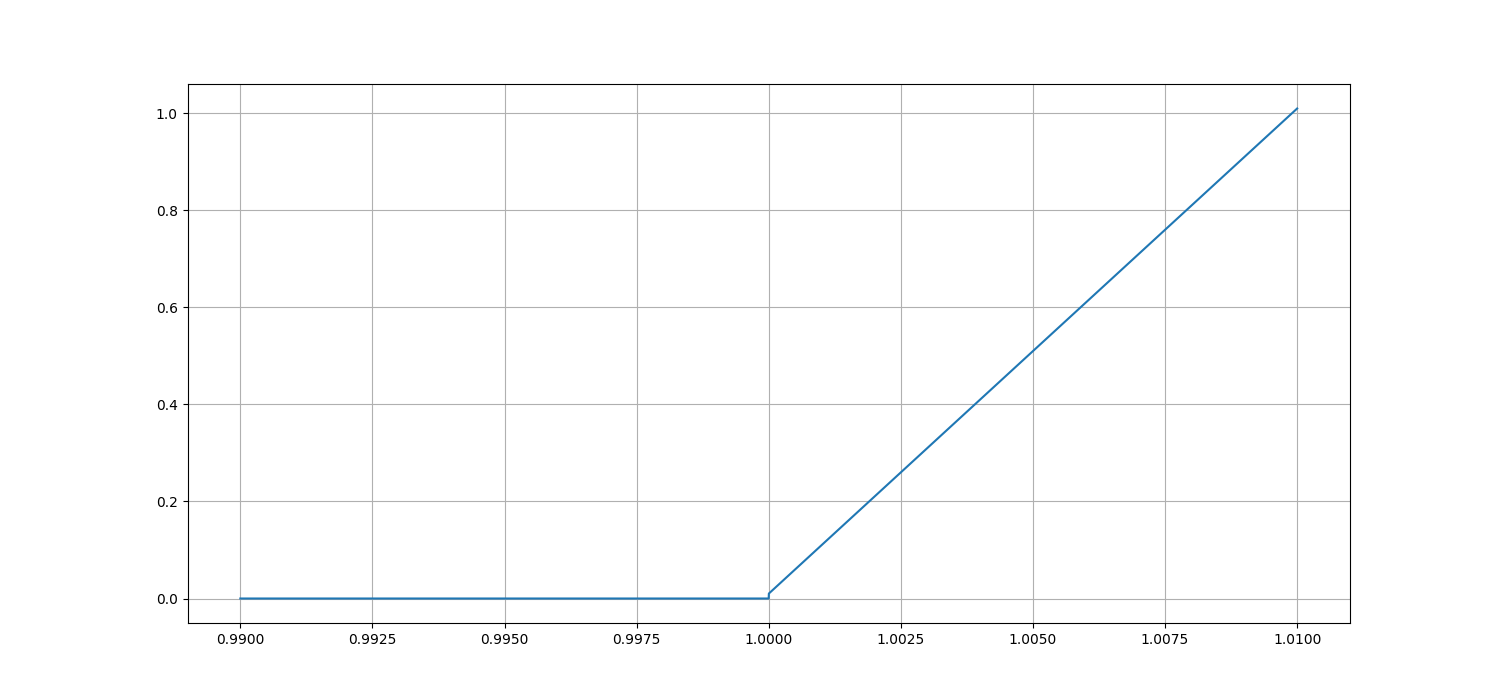

In [ ]:
measurments =   [   
                    (t0, Vout, "Vout(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0.99, 1.01, 0.000001, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

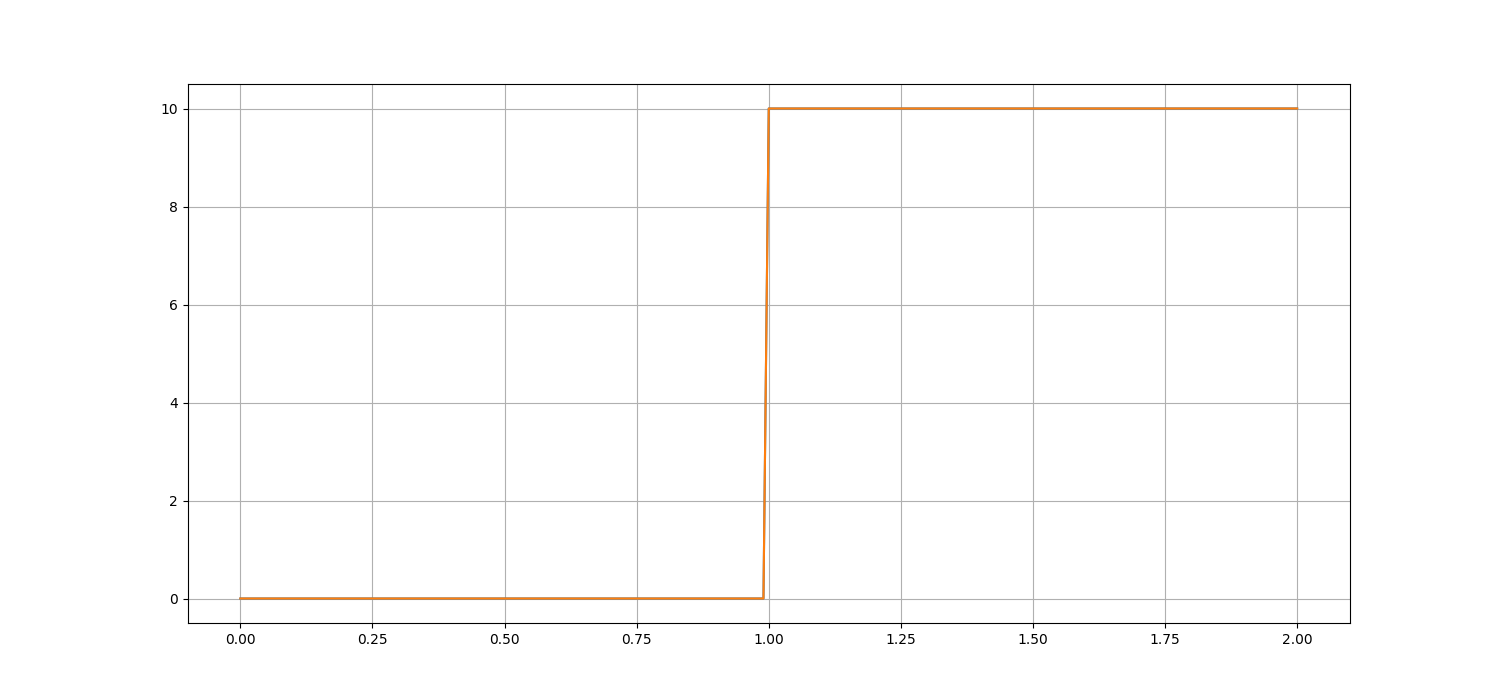

In [ ]:
measurments =   [   
                    (t0, 1e3 * Iin, "Iin(t)"),
                    (t0, 1e3 * Iout, "Iout(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

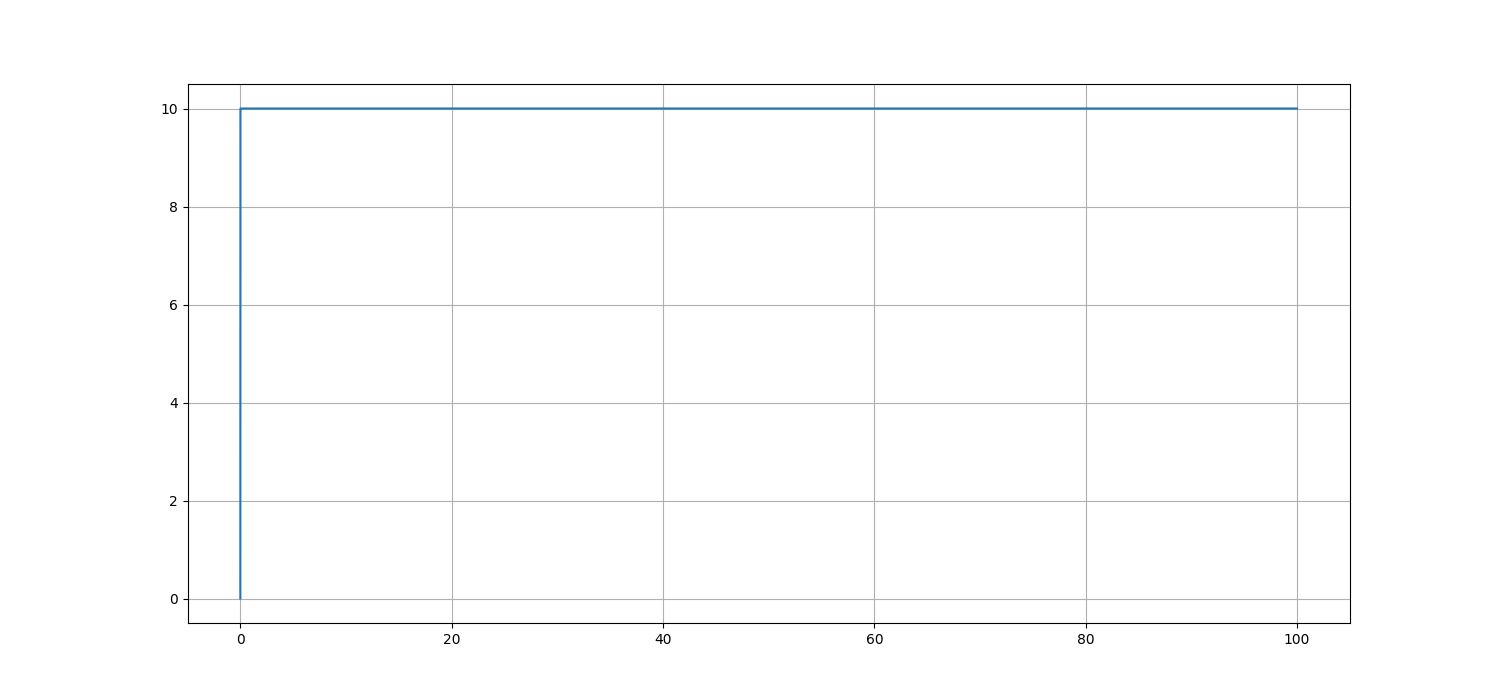

In [ ]:
measurments =   [   
                    (Vout, 1e3 * Iout, "Iin(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()